# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

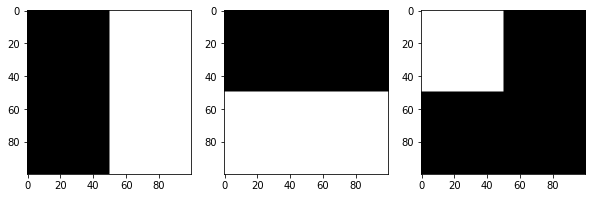

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


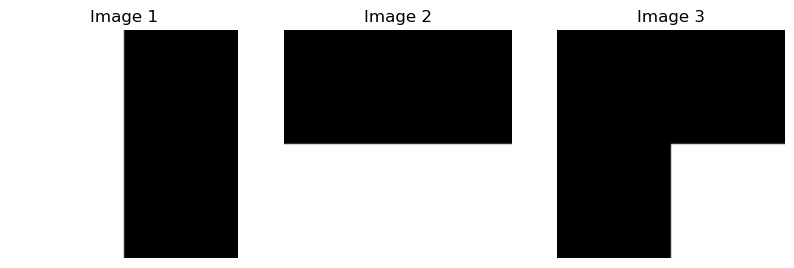

In [3]:
# solution

# Create three 100x100 binary images
img1 = np.zeros((100, 100))  # Black image
img1[:, :50] = 1  # Left half white

img2 = np.zeros((100, 100))
img2[50:, :] = 1  # Bottom half white

img3 = np.zeros((100, 100))
img3[50:, 50:] = 1  # Bottom-right quarter white

# Visualize the three images
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(img1, cmap="gray")
axes[0].set_title("Image 1")
axes[1].imshow(img2, cmap="gray")
axes[1].set_title("Image 2")
axes[2].imshow(img3, cmap="gray")
axes[2].set_title("Image 3")

for ax in axes:
    ax.axis("off")

plt.show()

*   Use the above three images to create the following image

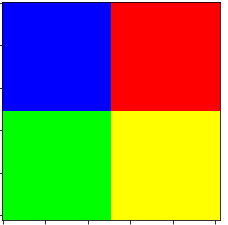
*Hint: Remember channels and color spaces*

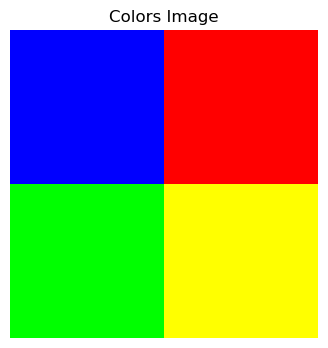

In [9]:
# solution

# Create a blank 100x100 RGB image (initialized as black)
color_image = np.zeros((100, 100, 3), dtype=np.uint8)

color_image[:50, :50] = [0, 0, 255]    # Top-left (Blue)
color_image[:50, 50:] = [255, 0, 0]    # Top-right (Red)
color_image[50:, :50] = [0, 255, 0]    # Bottom-left (Green)
color_image[50:, 50:] = [255, 255, 0]  # Bottom-right (Yellow)

plt.figure(figsize=(4, 4))
plt.imshow(color_image)
plt.title("Colors Image")
plt.axis("off")
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

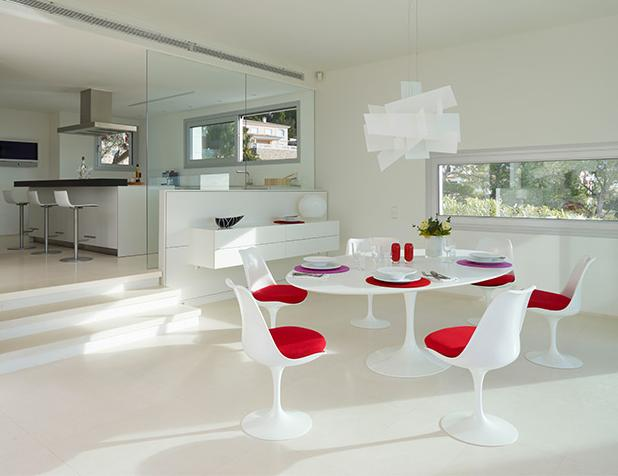

*   Extract individual channels and plot them using matplotlib subplot.



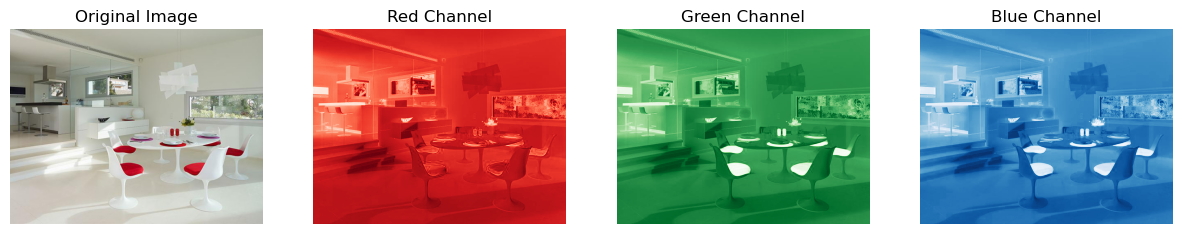

In [19]:
# solution

# Load the image
image = io.imread("images/sillas.jpg")

# Extract individual color channels
red_channel = image[:, :, 0]   # Red channel
green_channel = image[:, :, 1] # Green channel
blue_channel = image[:, :, 2]  # Blue channel

# Display the original and individual color channels
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Original image
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Red channel
axes[1].imshow(red_channel, cmap="Reds")
axes[1].set_title("Red Channel")
axes[1].axis("off")

# Green channel
axes[2].imshow(green_channel, cmap="Greens")
axes[2].set_title("Green Channel")
axes[2].axis("off")

# Blue channel
axes[3].imshow(blue_channel, cmap="Blues")
axes[3].set_title("Blue Channel")
axes[3].axis("off")

plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

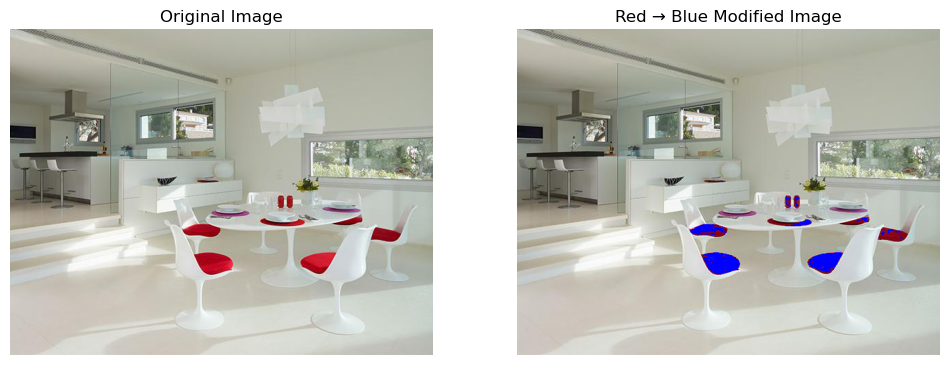

In [21]:
# solution

# Load the image
image = io.imread("images/sillas.jpg")

# Convert image to float for better manipulation
image_float = image.astype(np.float32)

# Define thresholds for red detection
red_threshold = 150  
green_threshold = 100
blue_threshold = 100

# Create a mask for red areas (high red, low green & blue)
red_mask = (image[:, :, 0] > red_threshold) & (image[:, :, 1] < green_threshold) & (image[:, :, 2] < blue_threshold)

# Create a copy of the image to modify
new_image = image.copy()

# Replace red with blue
new_image[red_mask] = [0, 0, 255]  # Blue color

# Display the original and modified images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(new_image)
axes[1].set_title("Red → Blue Modified Image")
axes[1].axis("off")

plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

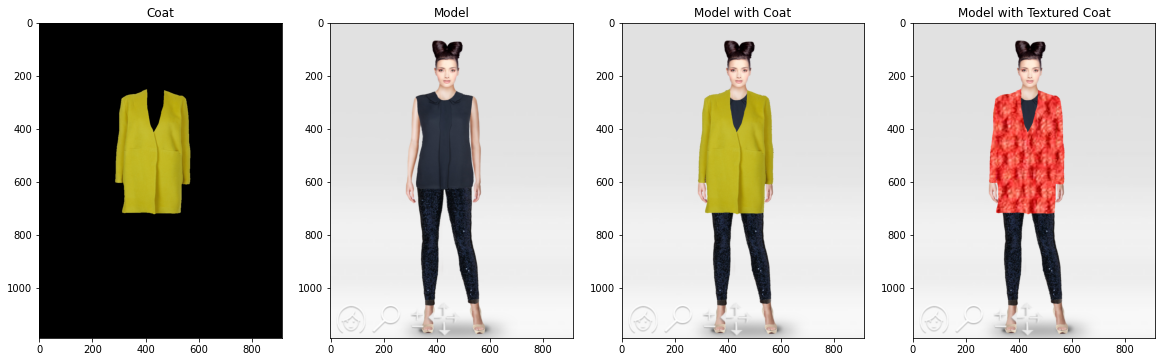

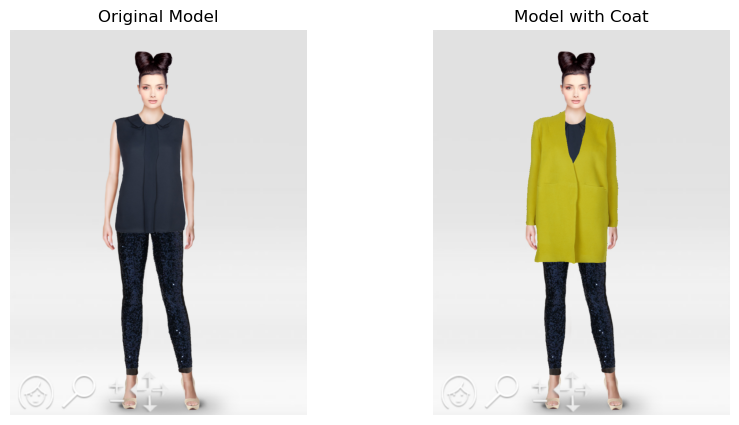

In [25]:
# solution
import cv2

# Load images
model = cv2.imread("images/model.png")
coat = cv2.imread("images/coat.png")

# Convert coat to grayscale to create a mask
gray_coat = cv2.cvtColor(coat, cv2.COLOR_BGR2GRAY)

# Create a binary mask where the coat exists
_, coat_mask = cv2.threshold(gray_coat, 1, 255, cv2.THRESH_BINARY)

# Invert the mask to remove coat area from the model
inverse_mask = cv2.bitwise_not(coat_mask)

# Resize coat image to match model dimensions
coat_resized = cv2.resize(coat, (model.shape[1], model.shape[0]))
coat_mask_resized = cv2.resize(coat_mask, (model.shape[1], model.shape[0]))
inverse_mask_resized = cv2.resize(inverse_mask, (model.shape[1], model.shape[0]))

# Extract the coat region from the coat image
coat_region = cv2.bitwise_and(coat_resized, coat_resized, mask=coat_mask_resized)

# Remove the coat area from the model image
model_background = cv2.bitwise_and(model, model, mask=inverse_mask_resized)

# Combine the model and coat images
combined = cv2.add(model_background, coat_region)

# Display original and modified images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(model, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Model")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
axes[1].set_title("Model with Coat")
axes[1].axis("off")

plt.show()

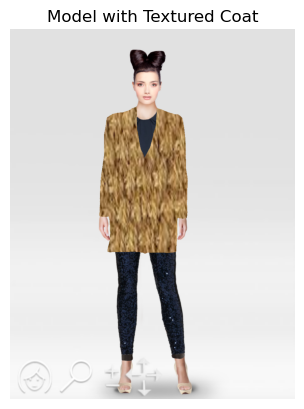

In [27]:
# Load and resize the texture
texture = cv2.imread("images/texture.png")
texture_resized = cv2.resize(texture, (model.shape[1], model.shape[0]))

# Apply texture only on the coat region
textured_coat = cv2.bitwise_and(texture_resized, texture_resized, mask=coat_mask_resized)

# Combine the textured coat with the model
final_output = cv2.add(model_background, textured_coat)

# Display the result
plt.imshow(cv2.cvtColor(final_output, cv2.COLOR_BGR2RGB))
plt.title("Model with Textured Coat")
plt.axis("off")
plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




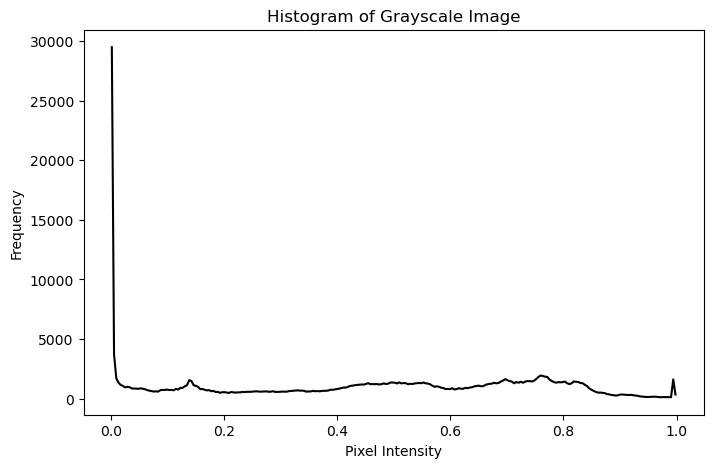

In [35]:
# solution
from skimage import data, color, exposure
import matplotlib.pyplot as plt

image = data.astronaut()
# Convert to grayscale
gray_image = color.rgb2gray(image)  # Now 'color' is correctly referenced
# Compute histogram
hist, bins = exposure.histogram(gray_image)
# Plot histogram
plt.figure(figsize=(8, 5))
plt.plot(bins, hist, color='black')
plt.title("Histogram of Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

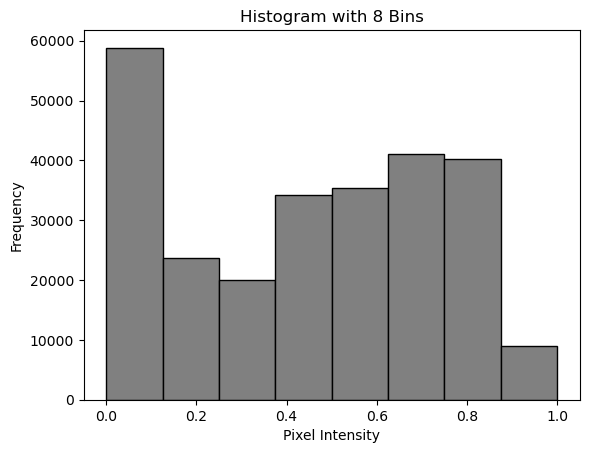

In [37]:
# solution

# Compute histogram with 8 bins
plt.hist(gray_image.ravel(), bins=8, color='gray', edgecolor='black')

# Customize plot
plt.title("Histogram with 8 Bins")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*
	1.	Low bin count (e.g., 8) makes the histogram less detailed.
	2.	High bin count (e.g., 256) provides a more precise distribution.
	3.	The ideal bin count depends on the image complexity and analysis needs.
*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


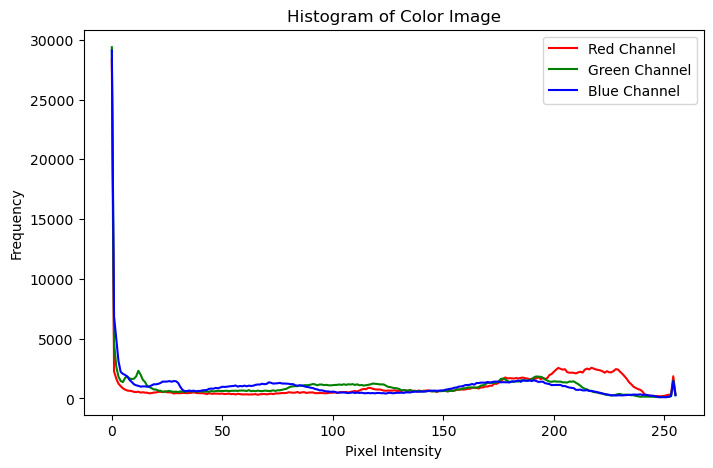

In [39]:
#solution

# Compute histograms for each color channel
hist_r, bins_r = exposure.histogram(image[:, :, 0])
hist_g, bins_g = exposure.histogram(image[:, :, 1])
hist_b, bins_b = exposure.histogram(image[:, :, 2])

# Plot histograms
plt.figure(figsize=(8, 5))
plt.plot(bins_r, hist_r, color="red", label="Red Channel")
plt.plot(bins_g, hist_g, color="green", label="Green Channel")
plt.plot(bins_b, hist_b, color="blue", label="Blue Channel")

# Customize plot
plt.title("Histogram of Color Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



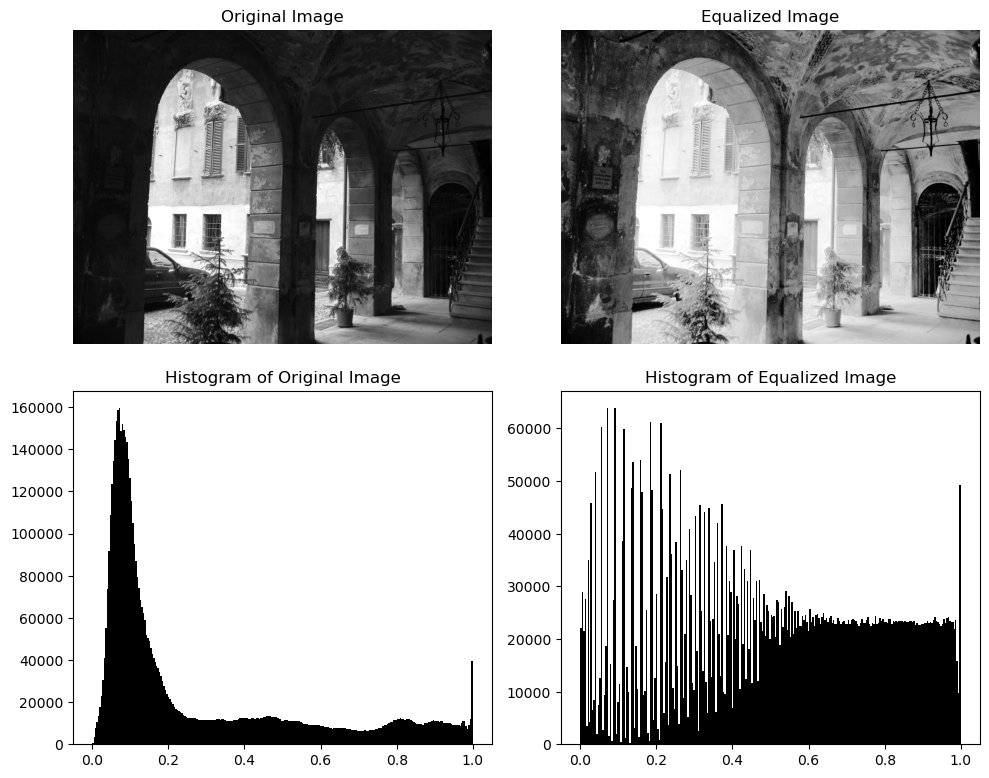

In [45]:
# solution
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure

image = io.imread("images/aquatermi_lowcontrast.jpg")
gray_image = color.rgb2gray(image)  # Convert to grayscale

# Compute histogram of original image
hist_orig, bins_orig = np.histogram(gray_image, bins=256, range=[0,1])

# Apply histogram equalization
equalized_image = exposure.equalize_hist(gray_image)

# Compute histogram of equalized image
hist_eq, bins_eq = np.histogram(equalized_image, bins=256, range=[0,1])

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].imshow(gray_image, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(equalized_image, cmap="gray")
axes[0, 1].set_title("Equalized Image")
axes[0, 1].axis("off")

axes[1, 0].hist(gray_image.ravel(), bins=256, color="black")
axes[1, 0].set_title("Histogram of Original Image")

axes[1, 1].hist(equalized_image.ravel(), bins=256, color="black")
axes[1, 1].set_title("Histogram of Equalized Image")

plt.tight_layout()
plt.show()



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*  •	Histogram Equalization adjusts intensities based on the cumulative distribution function (CDF).
	•	Linear Contrast Stretching simply scales pixel values linearly between the minimum and maximum intensity.
*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



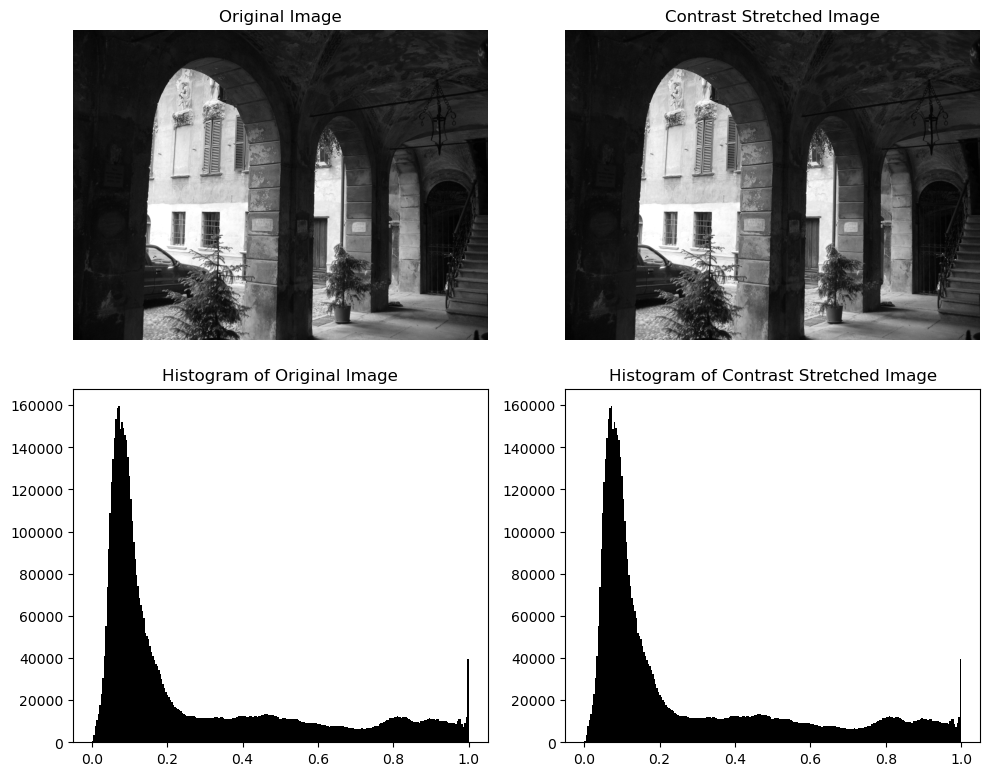

In [47]:
# solution
def contrast_stretch(image, min_out=0, max_out=1):
    min_in, max_in = np.min(image), np.max(image)
    stretched = (image - min_in) * ((max_out - min_out) / (max_in - min_in)) + min_out
    return stretched

# Apply Linear Contrast Stretch
stretched_image = contrast_stretch(gray_image)

# Compute histograms
hist_stretched, _ = np.histogram(stretched_image, bins=256, range=[0,1])

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].imshow(gray_image, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(stretched_image, cmap="gray")
axes[0, 1].set_title("Contrast Stretched Image")
axes[0, 1].axis("off")

axes[1, 0].hist(gray_image.ravel(), bins=256, color="black")
axes[1, 0].set_title("Histogram of Original Image")

axes[1, 1].hist(stretched_image.ravel(), bins=256, color="black")
axes[1, 1].set_title("Histogram of Contrast Stretched Image")

plt.tight_layout()
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




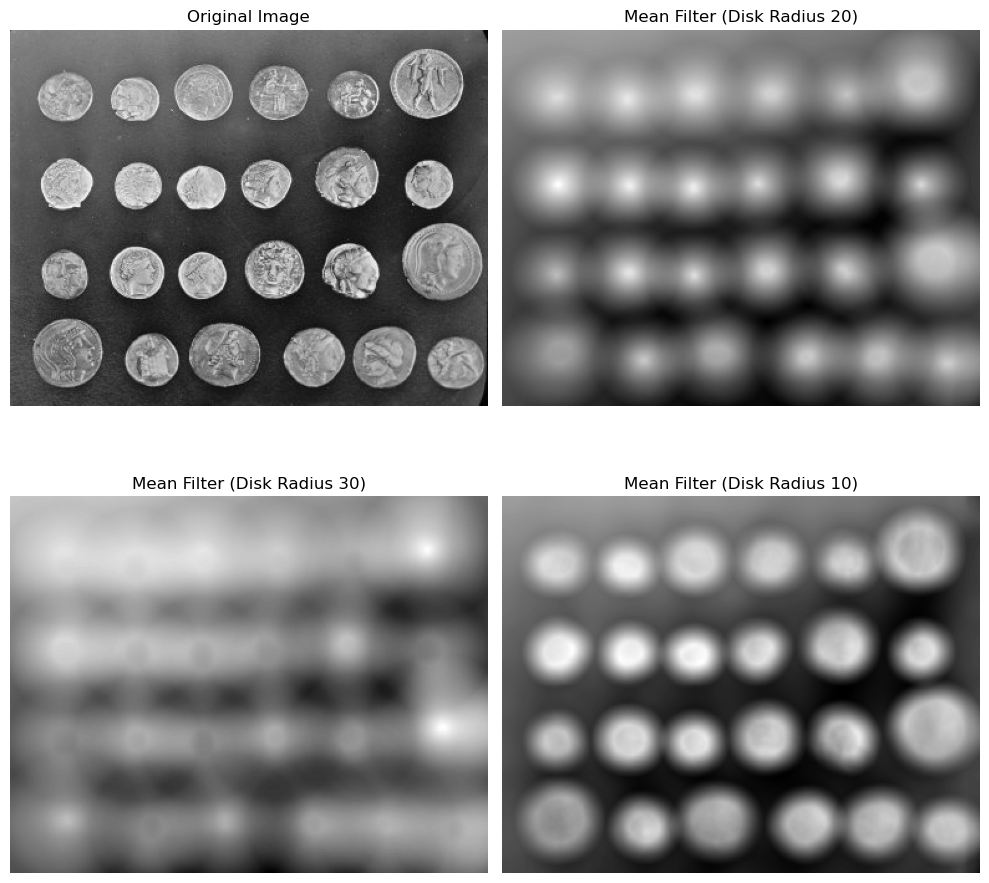

In [49]:
# solution
from skimage import data, filters, morphology
from skimage.morphology import disk

image = data.coins()

# Define structuring elements with different radii
selem1 = disk(20)  # Disk of radius 20
selem2 = disk(30)  # Increased radius
selem3 = disk(10)  # Decreased radius

# Apply mean filter using the different structuring elements
filtered1 = filters.rank.mean(image, selem1)
filtered2 = filters.rank.mean(image, selem2)
filtered3 = filters.rank.mean(image, selem3)

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(image, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(filtered1, cmap="gray")
axes[0, 1].set_title("Mean Filter (Disk Radius 20)")
axes[0, 1].axis("off")

axes[1, 0].imshow(filtered2, cmap="gray")
axes[1, 0].set_title("Mean Filter (Disk Radius 30)")
axes[1, 0].axis("off")

axes[1, 1].imshow(filtered3, cmap="gray")
axes[1, 1].set_title("Mean Filter (Disk Radius 10)")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

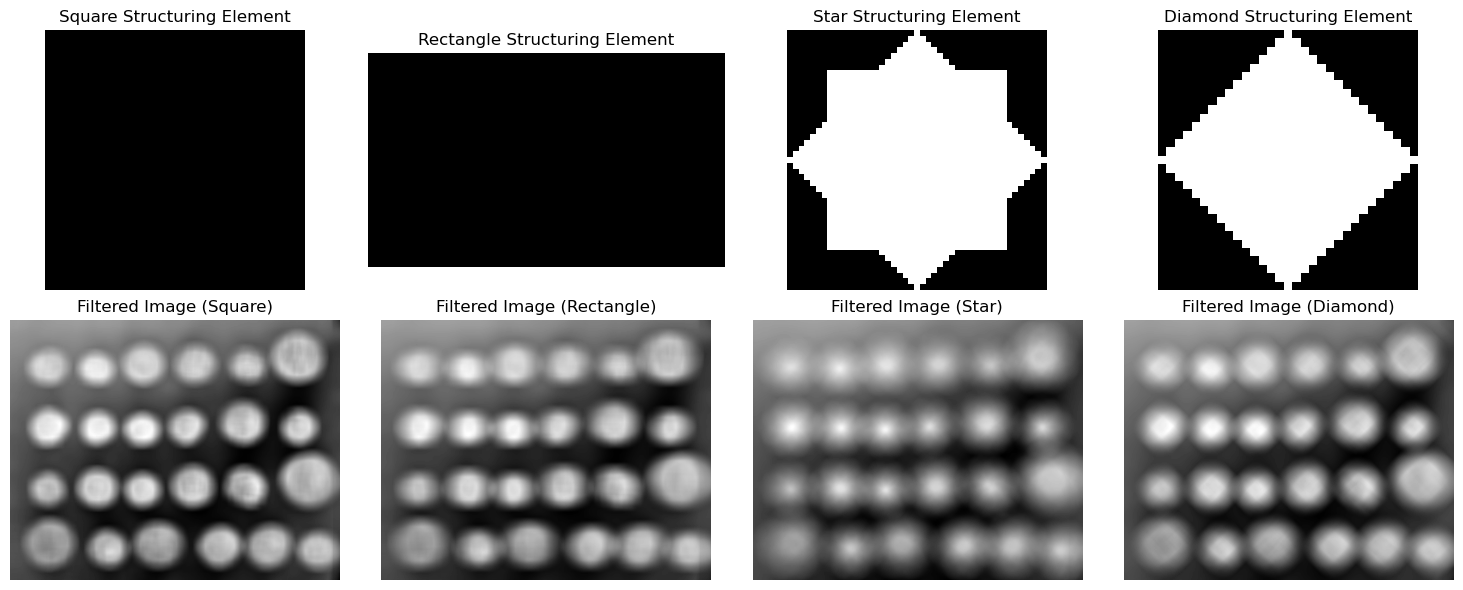

In [53]:
# solution
from skimage.morphology import square, rectangle, star, diamond

# Load the coins image and convert to 8-bit
image = data.coins().astype(np.uint8)

# Define different structuring elements
selem_dict = {
    "Square": square(15),
    "Rectangle": rectangle(15, 25),
    "Star": star(15),
    "Diamond": diamond(15)
}

# Apply mean filter using different structuring elements
filtered_images = {name: filters.rank.mean(image, selem) for name, selem in selem_dict.items()}

# Plot the results
fig, axes = plt.subplots(2, len(selem_dict), figsize=(15, 6))

for idx, (name, selem) in enumerate(selem_dict.items()):
    # Show structuring element
    axes[0, idx].imshow(selem, cmap="gray")
    axes[0, idx].set_title(f"{name} Structuring Element")
    axes[0, idx].axis("off")

    # Show filtered image
    axes[1, idx].imshow(filtered_images[name], cmap="gray")
    axes[1, idx].set_title(f"Filtered Image ({name})")
    axes[1, idx].axis("off")

plt.tight_layout()
plt.show()
   

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*	1. Increasing the radius results in stronger smoothing, making the image blurrier.
	2.	A smaller radius preserves more details while still reducing noise.
	3.	A larger radius removes finer details and noise but may also reduce important edges and textures.
    *

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*   •	Square: Provides uniform smoothing but may introduce blocky artifacts.
	•	Rectangle: Affects horizontal/vertical directions more strongly than diagonal ones.
	•	Star: Retains more details along diagonal directions.
	•	Diamond: Smoothens edges effectively while preserving some structure.
*

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

* - A mean filter applies equal-weight averaging, leading to basic blurring but poor edge          preservation.
-  A Gaussian filter applies weighted averaging, preserving edges better and providing smoother results while reducing noise more effectively
*

*
• Mean Filter: Used for simple smoothing tasks, reducing salt-and-pepper noise, and preprocessing.
• Gaussian Filter: Preferred in computer vision tasks like edge detection (before applying Canny edge detector) and high-quality image denoising.
*
...